<a href="https://colab.research.google.com/github/smirnovaanastasia1234/MDS-UFU-DL-TEST/blob/main/MDS_UFU_DL_TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт библиотек

In [1]:
!pip install keract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import files
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# Загрузка данных

In [4]:
uploaded = files.upload() #просто запускаем и выбираем файл  API токена в проводнике

Saving kaggle.json to kaggle.json


In [5]:
#↓ строка которая активирует наш API токен
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [6]:
#↓ добавился восклицательный знак, потому что это колаб
!kaggle competitions download -c mds-ufu-dl-test

 30% 5.00M/16.7M [00:00<00:00, 30.0MB/s]
100% 16.7M/16.7M [00:00<00:00, 72.4MB/s]


In [7]:
#↓ "распакуй" + имя архива
!unzip mds-ufu-dl-test.zip

Archive:  mds-ufu-dl-test.zip
  inflating: fmnist_test.csv         
  inflating: fmnist_train.csv        
  inflating: sample_submission.csv   


# Загружаем данные в Pandas

In [8]:
train=pd.read_csv("fmnist_train.csv")
test=pd.read_csv("fmnist_test.csv")

In [9]:
train.isnull().sum().sum()

424

# Анализ данных

In [10]:
train = train.fillna(0)

In [11]:
train.isnull().sum().sum()

0

In [12]:
test.isnull().sum().sum()

0

In [14]:
train.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Id
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0,2
3,0,0,0,0,1,2,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
5,4,0,0,0,5,4,5,5,3,5,...,8.0,7.0,4.0,3.0,7.0,5.0,0.0,0.0,0.0,5
6,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
7,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
8,4,0,0,0,0,0,0,3,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
9,8,0,0,0,0,0,0,0,0,0,...,214.0,166.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [16]:
test.head(10)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Id
0,0,0,0,0,0,0,0,9,8,0,...,87,56,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,63,53,31,0,0,0,2
3,0,0,0,0,0,0,0,0,0,161,...,126,140,0,133,224,222,56,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
5,0,0,0,0,0,44,105,44,10,0,...,64,30,0,0,0,0,0,0,0,5
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
7,0,0,0,0,0,0,0,1,0,0,...,136,155,31,0,1,0,0,0,0,7
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
9,0,0,0,0,0,0,0,0,0,0,...,70,28,0,2,0,0,0,0,0,9


In [17]:
y=train['label'].to_numpy()

In [18]:
X = train.iloc[:, 1:785].to_numpy()

In [19]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=15, shuffle=True, stratify=y)

In [20]:
val = test.iloc[:, 0:784].to_numpy()

In [21]:
# Различные константы
IMG_WIDTH, IMG_HEIGHT = 28, 28
BATCH_SIZE = 250
EPOCHS = 50
NUM_CLASSES = 10
VALIDATION_SPLIT = 0.2
VERBOSITY = 1

In [22]:
# Подготавливаем данные.
train_x = train_x.reshape(train_x.shape[0], IMG_WIDTH, IMG_HEIGHT, 1)
test_x = test_x.reshape(test_x.shape[0], IMG_WIDTH, IMG_HEIGHT, 1)
val_x =val.reshape(val.shape[0],IMG_WIDTH, IMG_HEIGHT, 1)

In [23]:
train_x.shape

(13632, 28, 28, 1)

In [24]:
test_x.shape

(3408, 28, 28, 1)

In [25]:
val_x.shape

(10000, 28, 28, 1)

In [26]:
input_shape = (IMG_WIDTH, IMG_HEIGHT, 1)

In [27]:
input_shape

(28, 28, 1)

In [28]:
# Нормализуем данные (0-255 -> 0-1.0).
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')
val_x = val_x.astype('float32')
train_x = train_x / 255
test_x = test_x / 255
val_x = val_x / 255

In [29]:
target_train = tf.keras.utils.to_categorical(train_y, NUM_CLASSES)

In [30]:
target_test = tf.keras.utils.to_categorical(test_y, NUM_CLASSES)

(28, 28, 1)


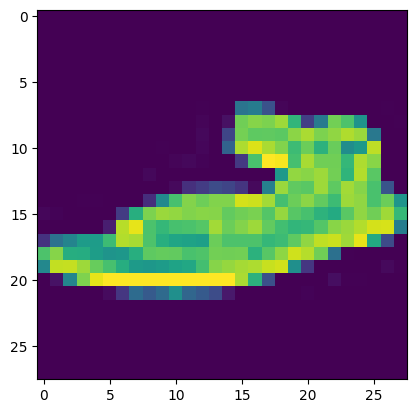

In [31]:
plt.imshow(val_x[30])
print(val_x[0].shape)

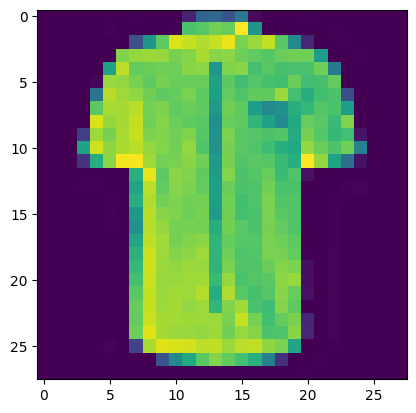

In [32]:

plt.imshow(train_x[2000].reshape(28, 28))
     

In [33]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Обучение

https://www.tensorflow.org/tutorials/keras/classification?hl=ru

In [34]:
#создаём модель.
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1,1), activation='relu', padding='same', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(10, kernel_size=(5, 5), strides=(1,1), activation='relu', padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [35]:

# И обучаем её.
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [36]:
model_history = model.fit(
    train_x,
    target_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=VERBOSITY,
    validation_split=VALIDATION_SPLIT
)

Epoch 1/50
44/44 [==============================] - 22s 431ms/step - loss: 0.9459 - accuracy: 0.6704 - val_loss: 0.5736 - val_accuracy: 0.7873
Epoch 2/50
44/44 [==============================] - 9s 195ms/step - loss: 0.5385 - accuracy: 0.8017 - val_loss: 0.4901 - val_accuracy: 0.8177
Epoch 3/50
44/44 [==============================] - 10s 235ms/step - loss: 0.4660 - accuracy: 0.8298 - val_loss: 0.4475 - val_accuracy: 0.8394
Epoch 4/50
44/44 [==============================] - 10s 223ms/step - loss: 0.4123 - accuracy: 0.8518 - val_loss: 0.4374 - val_accuracy: 0.8420
Epoch 5/50
44/44 [==============================] - 8s 186ms/step - loss: 0.3940 - accuracy: 0.8567 - val_loss: 0.3877 - val_accuracy: 0.8629
Epoch 6/50
44/44 [==============================] - 10s 235ms/step - loss: 0.3763 - accuracy: 0.8641 - val_loss: 0.3721 - val_accuracy: 0.8669
Epoch 7/50
44/44 [==============================] - 10s 226ms/step - loss: 0.3587 - accuracy: 0.8710 - val_loss: 0.3569 - val_accuracy: 0.8717
E

In [37]:
test_loss, test_acc = model.evaluate(test_x,  target_test, verbose=2)

print('\nTest accuracy:', test_acc)

107/107 - 2s - loss: 0.4724 - accuracy: 0.8850 - 2s/epoch - 20ms/step

Test accuracy: 0.8849765062332153


In [38]:
prediction = model.predict(val_x)
prediction.shape

313/313 [==============================] - 4s 12ms/step


(10000, 10)

In [39]:
category=[]
for i in prediction:
    category.append(np.argmax(i))

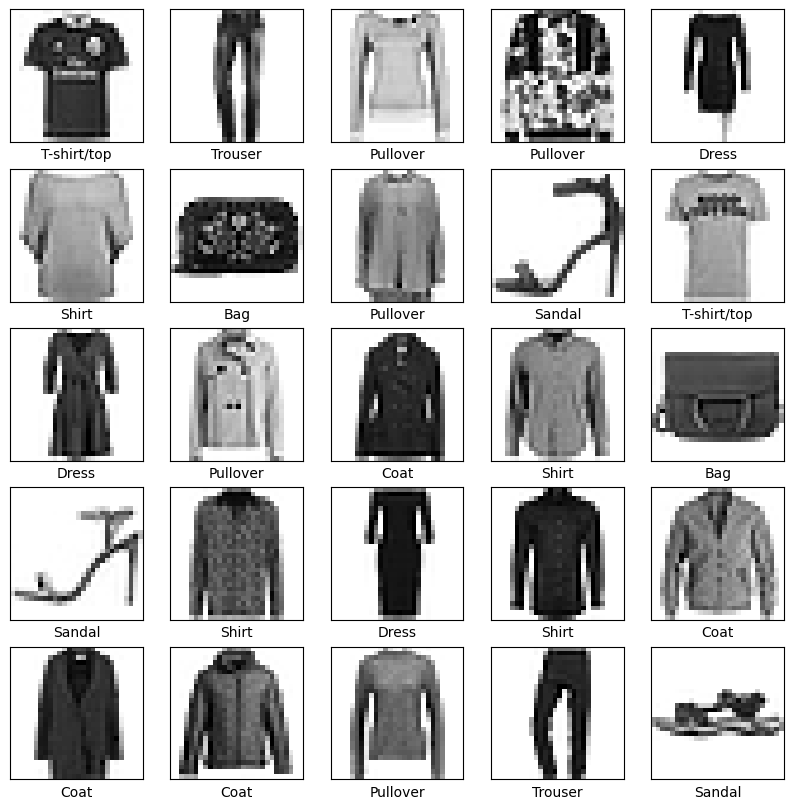

In [40]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(val_x[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[category[i]])
plt.show()

In [41]:
submission = {
    'Id': list(test.Id.values),
    'Category': category
}
solution = pd.DataFrame(submission)
solution.to_csv('submission_my.csv',index=False)

In [42]:
!kaggle competitions submit -c mds-ufu-dl-test -f submission_my.csv -m "Message" 

100% 67.3k/67.3k [00:00<00:00, 146kB/s]
Successfully submitted to [MDS-UFU-DL-TEST] Построение классификатора